In [1]:
import plotly.express as px
from sklearn.datasets import make_regression
import numpy as np

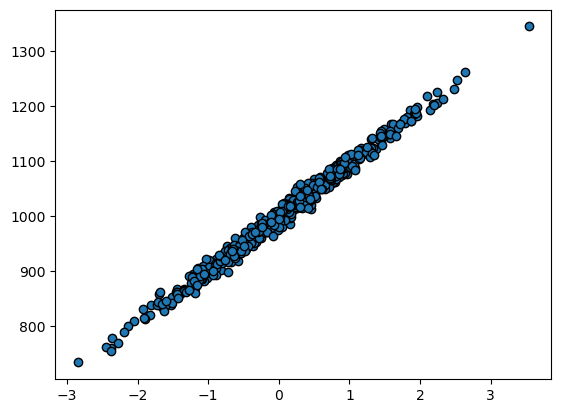

In [2]:
import matplotlib.pyplot as plt
x, y = make_regression(500, 1, noise=10, bias=1000)
x = x[:, 0]
plt.scatter(x, y, edgecolors='black')

In [3]:
def mse(w, w_0):
    return ((y - x * w + w_0)**2).sum()

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lin_reg = LinearRegression().fit(x.reshape(-1, 1), y)

In [6]:
lin_reg.coef_, lin_reg.intercept_

(array([97.07643278]), 999.8729369015382)

In [7]:
x.shape, y.shape

((500,), (500,))

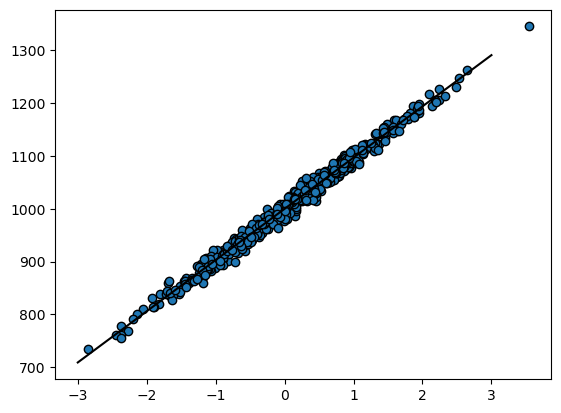

In [8]:
xx = np.linspace(-3, 3)
plt.scatter(x.reshape(-1), y, edgecolors='black')
plt.plot(xx, xx * lin_reg.coef_[0] + lin_reg.intercept_, c='black')

In [9]:
mse(28, 999)

2012523859.3821201

In [10]:
lin_reg.coef_, lin_reg.intercept_
x_min, x_max = lin_reg.coef_ - 10, lin_reg.coef_ + 10
y_min, y_max = lin_reg.intercept_ - 10, lin_reg.intercept_ + 10

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

points = np.column_stack((xx.ravel(), yy.ravel()))

In [11]:
z = np.zeros(1000000)
for i in range(len(z)):
    z[i] = mse(points[i, 0], points[i, 1])

In [12]:
z = z.reshape(xx.shape)

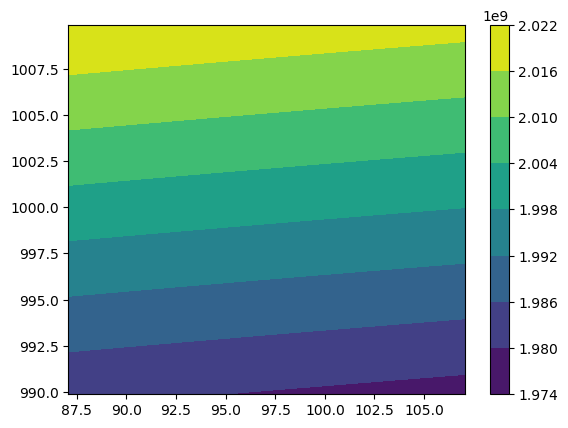

In [13]:
plt.contourf(xx, yy, z)
plt.colorbar()

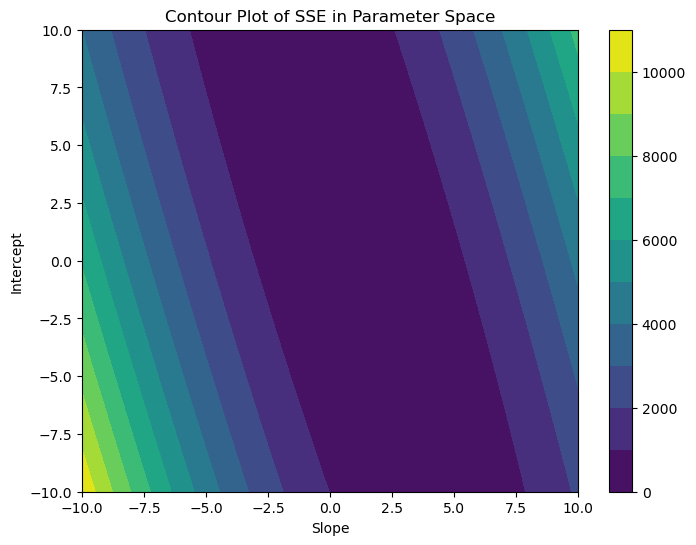

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Parameters to test
slope_range = np.linspace(-10, 10, 1000)
intercept_range = np.linspace(-10, 10, 1000)

# Initialize the SSE array
SSE = np.zeros((len(slope_range), len(intercept_range)))

# Calculate SSE for each combination of slope and intercept
for i, slope in enumerate(slope_range):
    for j, intercept in enumerate(intercept_range):
        y_pred = slope * x + intercept
        SSE[i, j] = np.sum((y - y_pred) ** 2)

# Contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(slope_range, intercept_range, SSE.T, levels=10, cmap='viridis')
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title('Contour Plot of SSE in Parameter Space')
plt.colorbar(contour)
plt.show()
